In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
import statsmodels.api as sm

In [3]:
df = pd.read_csv('data.csv')
df['volume_residential'] = df['volume_residential'].str.replace(',', '').astype(float)
df = df.dropna(subset=['gdp'])

In [4]:
X = df[["inflation rate", "interest rate", "gdp", "unemployment"]]
y = df["close_tower"].values

In [5]:
X = sm.add_constant(X)

In [6]:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     12.14
Date:                Thu, 20 Mar 2025   Prob (F-statistic):           4.73e-06
Time:                        20:50:07   Log-Likelihood:                -151.19
No. Observations:                  36   AIC:                             312.4
Df Residuals:                      31   BIC:                             320.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            104.4332    299.181      0.

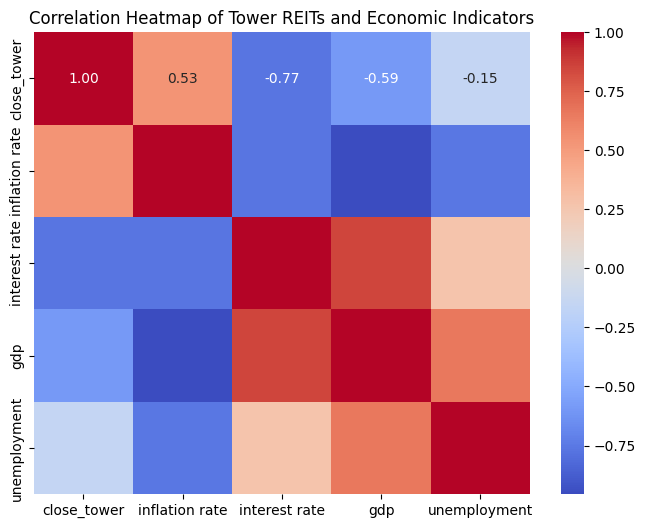

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(df[["close_tower", "inflation rate", "interest rate", "gdp", "unemployment"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Tower REITs and Economic Indicators")
plt.show()
